In [2]:
import numpy as np
import matplotlib.pyplot as plt 


Setting up the constants:

In [3]:
N = 1000    #number of grid points
r_min, r_max = 1e-5, 20    # setting up maximum r and minimum r
r = np.linspace(r_min, r_max, num= N)   # radial distance
dr = r[1] - r[0]    # step value
e2 = 3.795   # equivalent to e^2 
m = 0.511e6    # reduced mass of the electron
vpot = -e2/r    # potential energy in the hydrogen atom
h_bar = 1973/(2*np.pi)   # h bar 

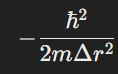

In [4]:
constant = -h_bar**2/(2*m*(dr**2))  


Kinetic Energy operator matrix: 

In [5]:
T = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i == j:
            T[i,j] = -2 * constant
        elif np.abs(i - j) == 1:
            T[i,j] = constant
T

array([[ 481.44308476, -240.72154238,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-240.72154238,  481.44308476, -240.72154238, ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , -240.72154238,  481.44308476, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  481.44308476,
        -240.72154238,    0.        ],
       [   0.        ,    0.        ,    0.        , ..., -240.72154238,
         481.44308476, -240.72154238],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
        -240.72154238,  481.44308476]])

Potential Energy operator matrix:

In [6]:
V = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i == j:
            V[i,j] = vpot[i]

V

array([[-3.79500000e+05,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.89465707e+02,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -9.47565069e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.90130642e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.89940130e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -1.89750000e-01]])

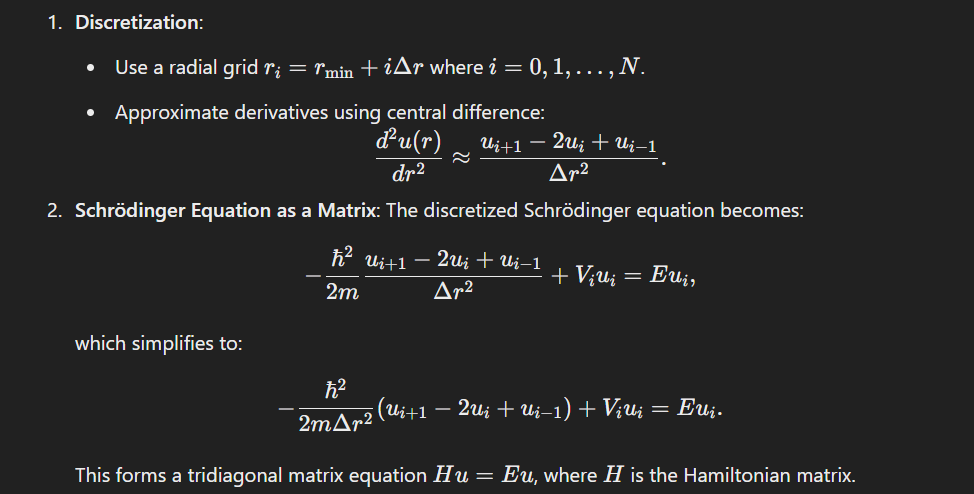

Initializing hamiltonian:

In [7]:
H = T + V

In [8]:
#boundary conditions
H[0,0] = H[-1,-1] = 1e10

In [9]:
H

array([[ 1.00000000e+10, -2.40721542e+02,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.40721542e+02,  2.91977378e+02, -2.40721542e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -2.40721542e+02,  3.86686578e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.81252954e+02, -2.40721542e+02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.40721542e+02,  4.81253145e+02, -2.40721542e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -2.40721542e+02,  1.00000000e+10]])

Calculating the eigen values for the different states: 

In [10]:
eigen_values, eigen_vectors = np.linalg.eigh(H)

In [11]:
ground_energy = eigen_values[0]    # energy eigen value for the ground state
first_energy = eigen_values[1]    # energy eigen value for the first excited state
print(ground_energy, first_energy)


-35.95553616087791 -9.238371004241584


Normalizing the wavefunctions:

In [12]:
def normalized(u):
    return np.sqrt(np.trapz(u**2, x = r))

groundstate_wavefunction = eigen_vectors[:,0]  
normalized_groundstate_wavefunction = normalized(groundstate_wavefunction)

first_excited_wavefunction = eigen_vectors[:,1]
normalized_first_excited_wavefunction = normalized(first_excited_wavefunction)

print(normalized_first_excited_wavefunction)

0.14149208461963522


PLOT:

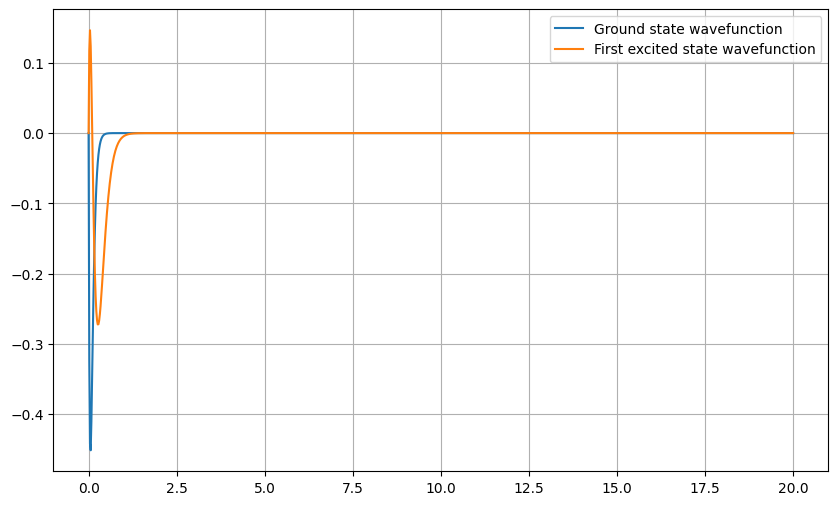

In [13]:
plt.figure(figsize=(10,6))
plt.plot(r, groundstate_wavefunction, label = "Ground state wavefunction")
plt.plot(r, first_excited_wavefunction, label = "First excited state wavefunction")
plt.legend()
plt.grid()
plt.show()